# Association Rule -Movie-Assignment

# Import Necessary Libraries 

In [110]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from mlxtend.frequent_patterns import apriori, association_rules
import warnings 
warnings.filterwarnings('ignore')

# Import the data 

In [111]:
movies=pd.read_csv('/Users/viswanathareddy/Assignments /Assocition Rule/my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# Data Understanding 

In [112]:
movies.shape

(10, 15)

In [89]:
movies.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [90]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
movies_x=movies.drop(movies.columns[5:16],axis=1)
movies_x.fillna('null' ,inplace = True)
movies_x

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,null,null
2,LOTR1,LOTR2,null,null,null
3,Gladiator,Patriot,Sixth Sense,null,null
4,Gladiator,Patriot,Sixth Sense,null,null
5,Gladiator,Patriot,Sixth Sense,null,null
6,Harry Potter1,Harry Potter2,null,null,null
7,Gladiator,Patriot,null,null,null
8,Gladiator,Patriot,Sixth Sense,null,null
9,Sixth Sense,LOTR,Gladiator,Green Mile,null


In [92]:
movies_list = movies_x.to_numpy().tolist()
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart', 'null', 'null'],
 ['LOTR1', 'LOTR2', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Harry Potter1', 'Harry Potter2', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'null', 'null', 'null'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'null', 'null'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile', 'null']]

In [93]:
j=len(movies_list)
i=0
while i < j:
    while 'null' in movies_list[i]:
        movies_list[i].remove('null')
    i+=1
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart'],
 ['LOTR1', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Harry Potter1', 'Harry Potter2'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']]

In [94]:
all_movies_list=[movie for transaction in movies_list for movie in transaction]
print(all_movies_list)
len(all_movies_list)

['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2', 'Gladiator', 'Patriot', 'Braveheart', 'LOTR1', 'LOTR2', 'Gladiator', 'Patriot', 'Sixth Sense', 'Gladiator', 'Patriot', 'Sixth Sense', 'Gladiator', 'Patriot', 'Sixth Sense', 'Harry Potter1', 'Harry Potter2', 'Gladiator', 'Patriot', 'Gladiator', 'Patriot', 'Sixth Sense', 'Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile']


30

In [95]:
from collections import Counter
from collections import OrderedDict

movie_frequency=Counter(all_movies_list)
print("Old data",movie_frequency)

movie_frequency=sorted(movie_frequency.items(), key = lambda x:x[1]) 
print("\nSorted Data:\n",movie_frequency)

#Split Items and their frequency
frequencies = list(reversed([i[1] for i in movie_frequency]))
movies = list(reversed([i[0] for i in movie_frequency]))

print("\n Movie List:",movies)
print("\n Movie Frequency",frequencies)

Old data Counter({'Gladiator': 7, 'Sixth Sense': 6, 'Patriot': 6, 'LOTR1': 2, 'Harry Potter1': 2, 'Green Mile': 2, 'LOTR2': 2, 'Braveheart': 1, 'Harry Potter2': 1, 'LOTR': 1})

Sorted Data:
 [('Braveheart', 1), ('Harry Potter2', 1), ('LOTR', 1), ('LOTR1', 2), ('Harry Potter1', 2), ('Green Mile', 2), ('LOTR2', 2), ('Sixth Sense', 6), ('Patriot', 6), ('Gladiator', 7)]

 Movie List: ['Gladiator', 'Patriot', 'Sixth Sense', 'LOTR2', 'Green Mile', 'Harry Potter1', 'LOTR1', 'LOTR', 'Harry Potter2', 'Braveheart']

 Movie Frequency [7, 6, 6, 2, 2, 2, 2, 1, 1, 1]


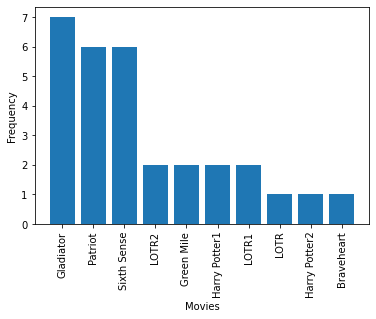

In [96]:
import matplotlib.pyplot as plt

plt.bar (movies,frequencies)
plt.xticks(rotation = 90)
plt.xlabel("Movies")
plt.ylabel("Frequency")
plt.show()

In [97]:
movie_series  = pd.DataFrame(pd.Series(movies_list))
movie_series.columns = ["Movie_Series"]
print(movie_series)

                                        Movie_Series
0  [Sixth Sense, LOTR1, Harry Potter1, Green Mile...
1                   [Gladiator, Patriot, Braveheart]
2                                     [LOTR1, LOTR2]
3                  [Gladiator, Patriot, Sixth Sense]
4                  [Gladiator, Patriot, Sixth Sense]
5                  [Gladiator, Patriot, Sixth Sense]
6                     [Harry Potter1, Harry Potter2]
7                               [Gladiator, Patriot]
8                  [Gladiator, Patriot, Sixth Sense]
9         [Sixth Sense, LOTR, Gladiator, Green Mile]


In [98]:
X = movie_series['Movie_Series'].str.join(sep='*')
print(X)

0    Sixth Sense*LOTR1*Harry Potter1*Green Mile*LOTR2
1                        Gladiator*Patriot*Braveheart
2                                         LOTR1*LOTR2
3                       Gladiator*Patriot*Sixth Sense
4                       Gladiator*Patriot*Sixth Sense
5                       Gladiator*Patriot*Sixth Sense
6                         Harry Potter1*Harry Potter2
7                                   Gladiator*Patriot
8                       Gladiator*Patriot*Sixth Sense
9               Sixth Sense*LOTR*Gladiator*Green Mile
Name: Movie_Series, dtype: object


In [101]:
frequent_movies = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
print("Raw Data:\n",frequent_movies.head())

frequent_movies.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",frequent_movies.head())

Raw Data:
    support         itemsets
0      0.1     (Braveheart)
1      0.7      (Gladiator)
2      0.2     (Green Mile)
3      0.2  (Harry Potter1)
4      0.1  (Harry Potter2)

Sorted as per Support value:
     support                  itemsets
1       0.7               (Gladiator)
14      0.6      (Patriot, Gladiator)
8       0.6                 (Patriot)
9       0.6             (Sixth Sense)
15      0.5  (Gladiator, Sixth Sense)


In [100]:
X= X.str.get_dummies(sep='*')
X

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,0,0,1,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,0,1,1
6,0,0,0,1,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,1,1
9,0,1,1,0,0,1,0,0,0,1


In [78]:
rules = association_rules(frequent_movies, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
18,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
77,(LOTR1),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
75,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
73,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
...,...,...,...,...,...,...,...,...,...
10,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
28,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


In [79]:
frequent_movies = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
print("Raw Data:\n",frequent_movies.head())

frequent_movies.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",frequent_movies.head())

Raw Data:
    support         itemsets
0      0.1     (Braveheart)
1      0.7      (Gladiator)
2      0.2     (Green Mile)
3      0.2  (Harry Potter1)
4      0.1  (Harry Potter2)

Sorted as per Support value:
     support                  itemsets
1       0.7               (Gladiator)
14      0.6      (Patriot, Gladiator)
8       0.6                 (Patriot)
9       0.6             (Sixth Sense)
15      0.5  (Gladiator, Sixth Sense)


In [80]:
rules = association_rules(frequent_movies, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
18,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
77,(LOTR1),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
75,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
73,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
...,...,...,...,...,...,...,...,...,...
10,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
28,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


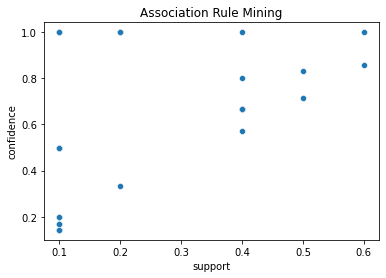

In [81]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule Mining")
plt.show()

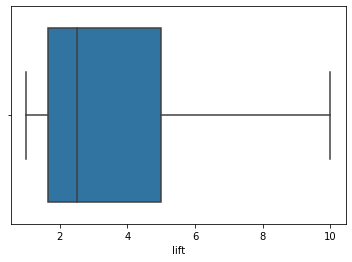

In [82]:
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

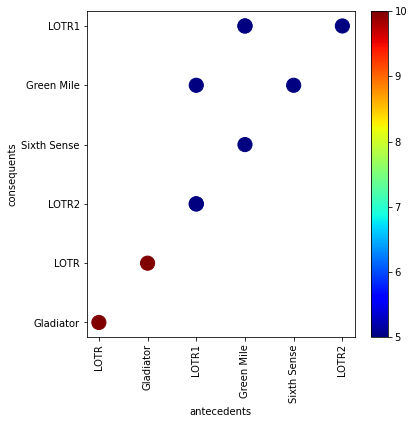

In [102]:
X1 = rules.antecedents.iloc[0:10]
Y1 = rules.consequents.iloc[0:10]
Z1 = rules.lift.iloc[0:10]


X1 = X1.apply(lambda x: list(x)[0]).astype("unicode")
Y1 = Y1.apply(lambda x: list(x)[0]).astype("unicode")

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X1,Y1, s = 200, c=Z1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

In [103]:
df= pd.read_csv('/Users/viswanathareddy/Assignments /Assocition Rule/my_movies.csv')
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [104]:
df.drop(columns=['V1','V2','V3','V4','V5'],inplace=True,axis=1)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [105]:
frequent_itemsets=apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [106]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(Green Mile),"(LOTR1, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR1),"(Green Mile, Sixth Sense, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Sixth Sense),"(LOTR1, Green Mile, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [107]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
210,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
213,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
225,"(LOTR1, Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
156,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
138,"(Gladiator, Sixth Sense, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
157,"(Sixth Sense, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
184,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
185,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
172,"(Sixth Sense, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
215,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


<AxesSubplot:xlabel='support', ylabel='confidence'>

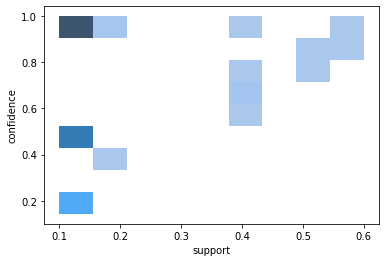

In [108]:
sns.histplot(x='support',y='confidence',data=rules)

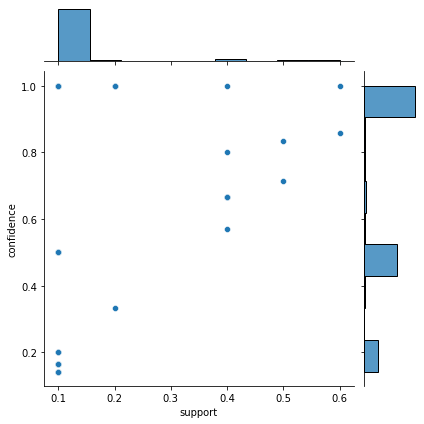

In [109]:
sns.jointplot(x='support',y='confidence',data=rules)